In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/maer3/anaconda/envs/bayesian/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Purpose

Just testing my intuition w.r.t. degrees of freedom in the students T distribution.

- Cauchy: df = 1.
- Normal: df = infinity.

This should be reflected when using PyMC3.

In [16]:
normal = np.random.normal(size=200000)
cauchy = np.random.standard_cauchy(size=200000)

In [27]:
with pm.Model() as normal_model:    
    mu = pm.Normal('mu', mu=0, sd=100)
    sd = pm.HalfNormal('sd', sd=100)
    nu = pm.Exponential('nu', lam=1)
    like = pm.StudentT('like', mu=mu, sd=sd, nu=nu, observed=normal)
    
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/maer3/anaconda/envs/bayesian/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|█████████▉| 2498/2500 [01:47<00:00, 23.23it/s]/Users/maer3/anaconda/envs/bayesian/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.9106439177085297, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 2500/2500 [01:47<00:00, 23.23it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c31a63f60>,
      dtype=object)

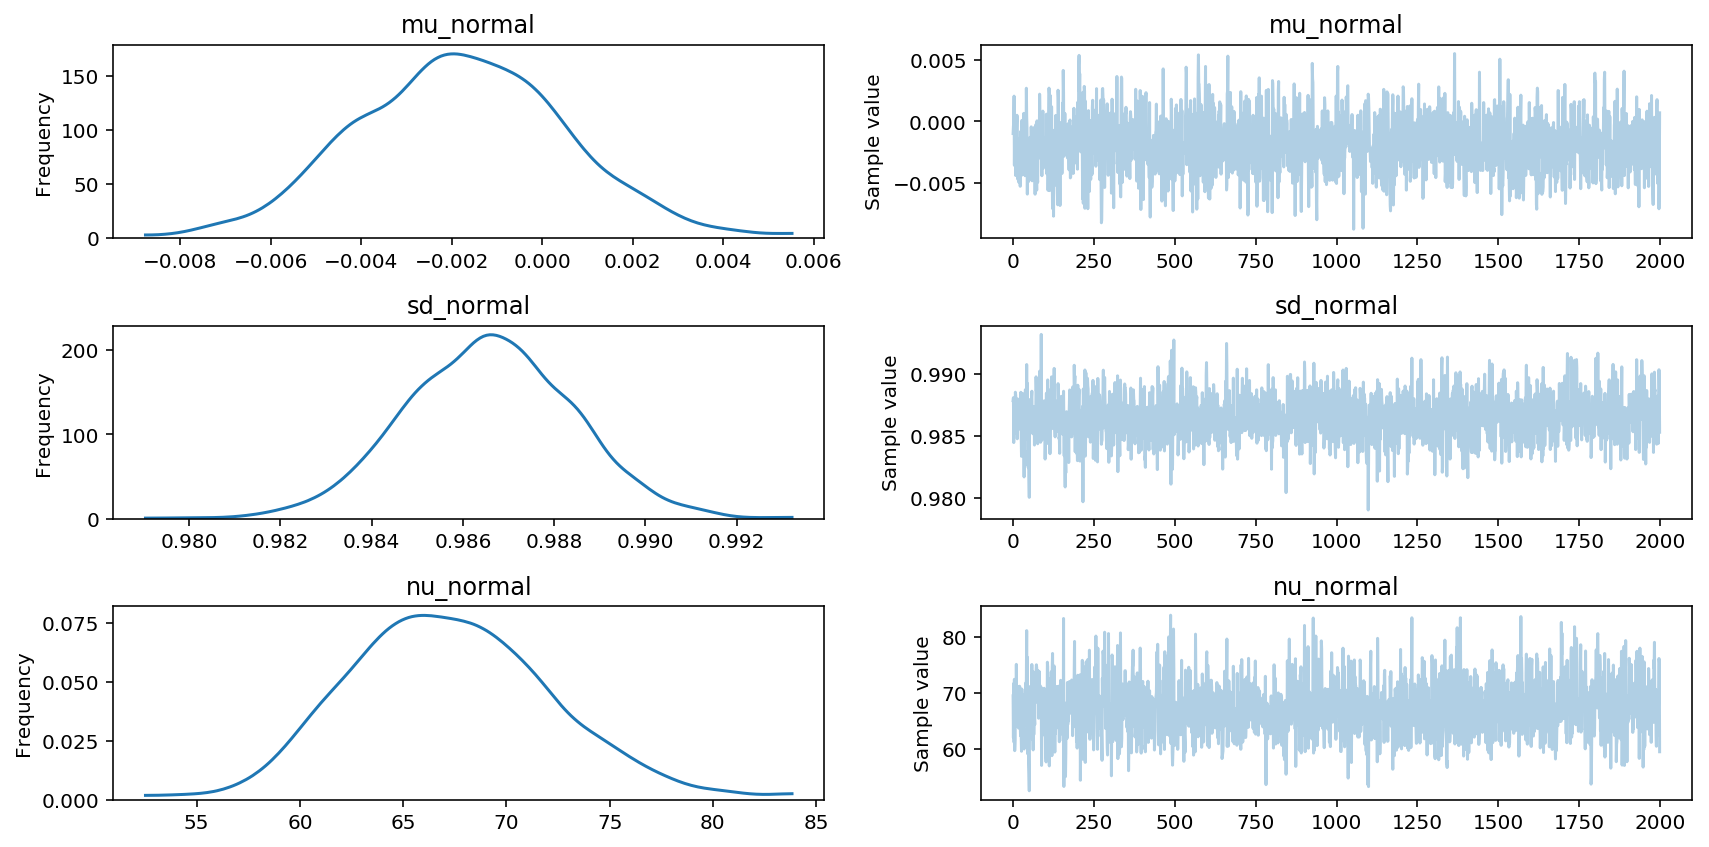

In [28]:
pm.traceplot(trace)

Many degrees of freedom for normal distribution. Makes sense.

In [29]:
with pm.Model() as cauchy_model:    
    mu = pm.Normal('mu', mu=0, sd=100)
    sd = pm.HalfNormal('sd', sd=100)
    nu = pm.Exponential('nu', lam=1)
    like = pm.StudentT('like', mu=mu, sd=sd, nu=nu, observed=cauchy)
    
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/maer3/anaconda/envs/bayesian/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████| 2500/2500 [01:52<00:00, 22.27it/s]/Users/maer3/anaconda/envs/bayesian/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.8883976052792679, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a14edd8>,
      dtype=object)

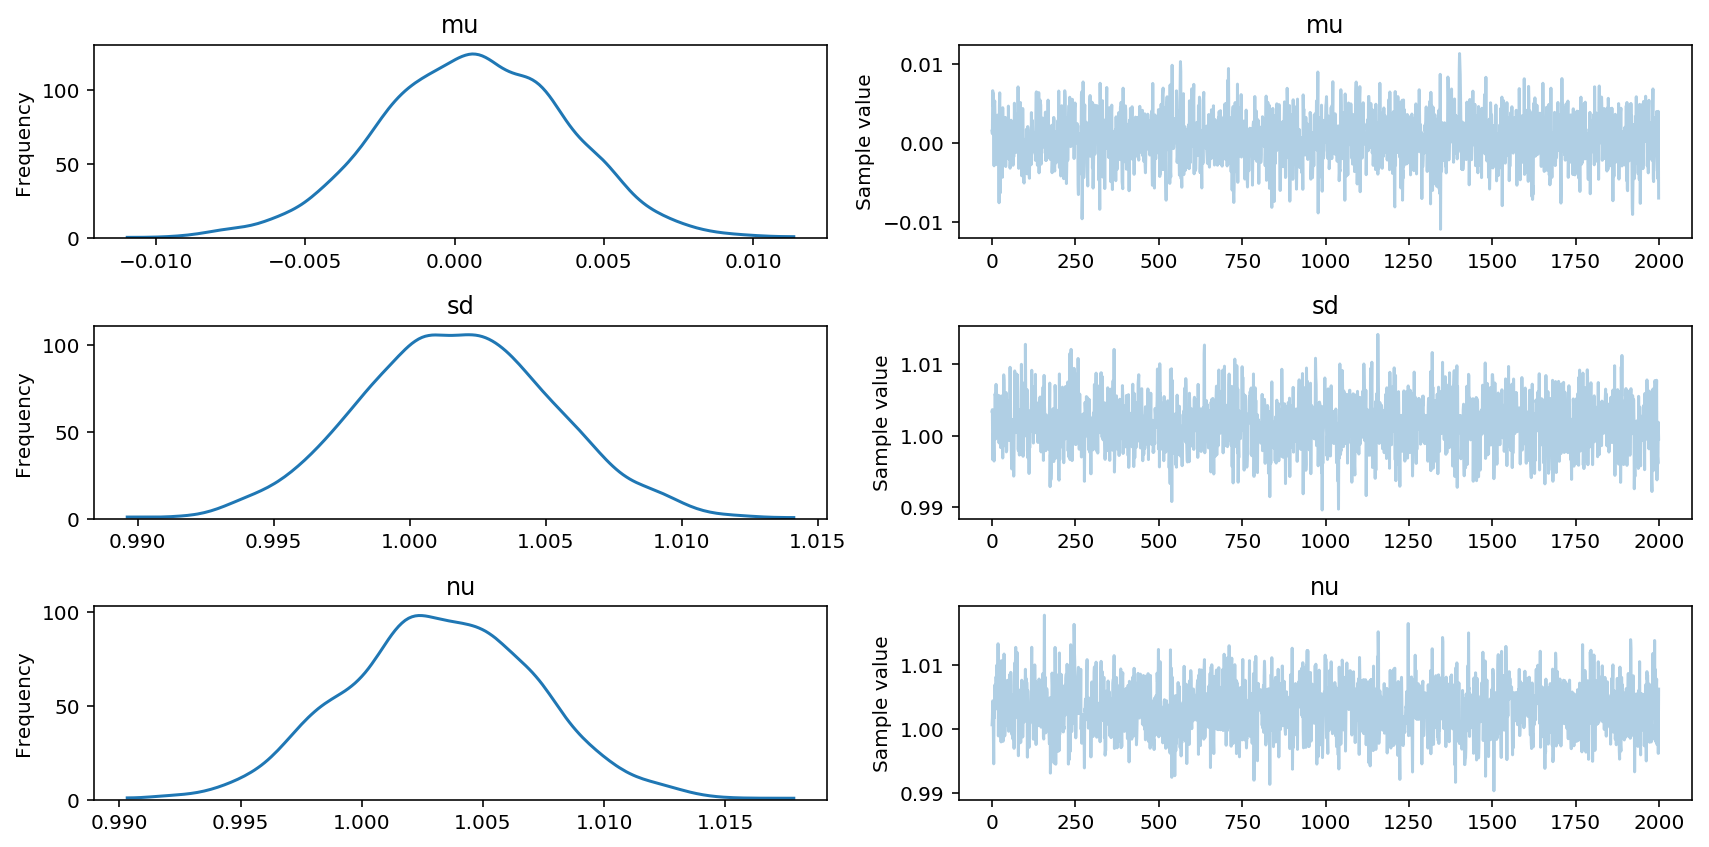

In [30]:
pm.traceplot(trace)

Yes :)